# Lending Club Case Study

## Problem statement:
If I work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


Importing required python libraries useful for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Data loading:
Data provided contains information about past loan applicants and whether they ‘defaulted’ or not. Applications that are rejected data is not available in dataset.

In [2]:
# Loading dataset from loan.csv file
df_lender = pd.read_csv('loan.csv')
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
# Describe data summary
df_lender.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# Display shape of dataset
print("Shape of dataframe: ", df_lender.shape)

Shape of dataframe:  (39717, 111)


### Initial observation from dataset
Loan dataset have 111 columns and 39717 user details.
Among all columns only 87 columns have numeric values before manupulating/converting data types.

Now we will proceed forther to investigate how many columns actually valid.

## Data cleaning:
### Filter columns:

#### Unique value columns:

There are some columns with no variation in the values. These columns are not much usefull for analysis.
We can remove such columns at the begining of analysis can resuce confusion.

In [5]:

# Removing columns with single value
for column_name in df_lender.columns:
    if df_lender[column_name].nunique(dropna=True) == 1:
        df_lender = df_lender.drop(column_name, axis=1)

#### Removing unwanted/non-relative columns:
There are some columns which have information about loan details but they are not usefull for analysis. So we can remove those columns to avoid confusion.

In [6]:
# Removing url column
df_lender = df_lender.drop('url', axis=1)
# Removing 'title' column
df_lender = df_lender.drop('title', axis=1)

In [7]:
s_null_mean = df_lender.isnull().mean()
print("Number of columns with more then 90% null values :", sum(s_null_mean > 0.9))
print("Number of columns with more then 70% null values :", sum(s_null_mean > 0.6))
print("Number of columns with more then 40% null values :", sum(s_null_mean > 0.3))

Number of columns with more then 90% null values : 56
Number of columns with more then 70% null values : 57
Number of columns with more then 40% null values : 58


As per above output the input dataset have
- 56 columns with more then 90% values are not available.
- 57 columns with more then 60% values are not available..
- 58 columns with more then 30% values are not available.

Now lets get the name and discription of columns which are having more then 30% null values and less then 90% null values.
                                                

In [8]:
list_column_names_90p = s_null_mean.index[~(s_null_mean > 0.9)].tolist()
list_column_names_40p = s_null_mean.index[~(s_null_mean > 0.3)].tolist()
diff_90p_40p = [x for x in list_column_names_90p if x not in list_column_names_40p]
diff_90p_40p

['desc', 'mths_since_last_delinq']

From above output we got the information about columns which have more then 30% and less then 90% of null values are:
 - 'desc' as per data dictonary, Loan description provided by the borrower.
 - 'mths_since_last_delinq' as per data dictionary, The number of months since the borrower's last delinquency.
 Both above parameters are importent for loan process so we can't remove these columns.
 
 Now we can proceed for data cleaning and manipulation of data based on available information.

In [9]:
df_lender = df_lender[list_column_names_90p]
s_null_mean  = df_lender.isnull().mean().sort_values()
s_null_mean

id                         0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
out_prncp                  0.000000
delinq_2yrs                0.000000
out_prncp_inv              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
total_pymnt                0.000000
addr_state                 0.000000
dti                        0.000000
purpose                    0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
zip_code                   0.000000
loan_amnt                  0

In [10]:
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Now we have 45 columns in dataset after removing invalid columns

### Filtering rows:
From privius output there are some rows which data is not available. So now we will clean the data with respect to row wise based on discription and relation of data with the case study. To simplify the process will start from higher mean value.

<b>mths_since_last_delinq:</b>
This column has more then 60% data is null values. But removing the eantire row with respect to this column will lead to loss of information. So for now I wont consider this column for filtering rows.

<b>desc</b>
This column has more then 30% null values and filtering with respect to this column also leads to loss of data. Also as per discription of this column 'Loan description' we can make new catagorical column from this column so I am not considering this column for filtering rows.

<b>emp_title</b>
As per description of this column this is the job title of empoyee provided when loan request. And observed that there are vast number of titles present in this column so is not good idea to consider this column for row filtering.


<b>emp_length:</b>
We can consider this column information for filtering rows where null values are present in this column. Also as per discription 'emp_length' is very importent factor for analysis on Loans so keeping null values in this column will leads to false analysis report.
So we consider droping rows based on columns which have less then <b>3%</b> null values.


In [11]:
columns_row_filter = s_null_mean.index[(s_null_mean < 0.03) & (s_null_mean > 0)].tolist()
df_lender = df_lender[~(df_lender[columns_row_filter].isnull().any(axis=1))]
df_lender.isnull().mean().sort_values()

id                         0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
delinq_2yrs                0.000000
out_prncp_inv              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_d               0.000000
last_pymnt_amnt            0.000000
total_pymnt                0.000000
last_credit_pull_d         0.000000
dti                        0.000000
zip_code                   0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0

In [12]:
print("number of rows after filtering rows: ", df_lender.shape[0])

number of rows after filtering rows:  37835


### Data manipuation and conversion:


After removing invalid columns from dataframe we found that there are 55 columns with 37823 entries are remaining for analysis.
But there are some columns have different datatype (like integers as object). To get filtered data for relative columns with proper datatypes we need to process each column data seperatly using 'lambda' function.
The following functions are implemented to manipulate or filter as per data dictonary and data available in loans dataset.

<b> term:</b>
This column is defined as 'object' because values are in months and each value in column is followed by string 'months'. the following function will filter 'term'column using lambda function.

In [13]:
df_lender.term = df_lender.term.apply(lambda x:int(x.replace(' months','')))

Now the column 'term' values are converted to integers. each value represents number of months the member term duration of loans. Now here we can also maniputate data for term column by converting months in to years and we will add new column with name 'term_years' in following code line.

In [14]:
df_lender['term_years'] = df_lender.term.apply(lambda x:x/12)

<b>int_rate:</b>
This column is defined as 'object' becuase each valu in this column tagged with '%' denoting percentage of interest. noe wi will remove the tags for values and convert this column to 'float' type.
Also we can make a catagorical variable from this column by making interest bins.


In [15]:
df_lender.int_rate = df_lender.int_rate.apply(lambda x:float(x.replace('%','')))
interest_bins = [5,10,15,20,25]
df_lender['int_bin'] = pd.cut(df_lender['int_rate'], interest_bins).apply(lambda x: '-'.join([str(x.left), str(x.right)]))

<b>loan_amnt:</b>
This column has numerical value representing The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<b>funded_amnt:</b>
This column has numerical value representing The total amount committed to that loan at that point in time.

<b>funded_amnt_inv:</b>
This column has numerical value representing The total amount committed by investors for that loan at that point in time.

As there is not much difference in values between these 3 columns we can make bins for 'loan_amnt' column based on value for easy analysis as follows.

In [16]:

loan_amnt_bins = [0,5000,10000,15000,20000,25000,30000,35000]
df_lender['loan_amnt_bin_k'] = pd.cut(df_lender['loan_amnt'], loan_amnt_bins).apply(lambda x: '-'.join([str(int(x.left/1000)), str(int(x.right/1000))]))

<b>installment:</b>
For this column also we can make bins for analysis based on installment made from users.

In [17]:

installment_bins = [x for x in range(0,1401,100)]
df_lender['installment_bin_100s'] = pd.cut(df_lender['installment'], installment_bins).apply(lambda x: '-'.join([str(int(x.left/100)), str(int(x.right/100))]))

<b>annual_inc:</b>
This column descibes self-reported annual income provided by the borrower during registration. This is a numarical column.
From this column we can apply binning based on incomrage and make new catagorical column. As per observation there is a huge gap between minimum and maximum values from this column. To understamd distibution of intries we can use box plot here

Minimum of annual_inc: 4000.0
Maximum of annual_inc: 6000000.0


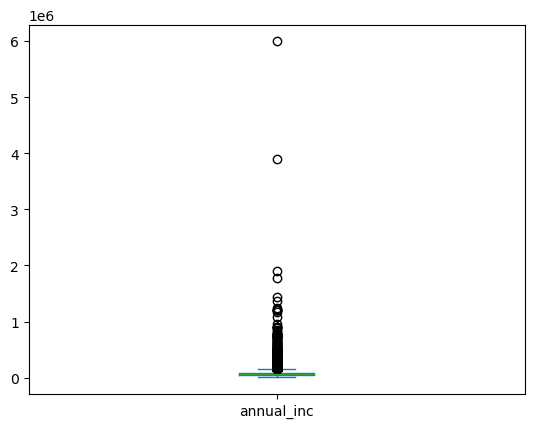

In [18]:
print("Minimum of annual_inc:", df_lender.annual_inc.min())
print("Maximum of annual_inc:", df_lender.annual_inc.max())
df_lender.annual_inc.plot.box()
plt.show()

From figure we can observe that most of the members are earning below 2 Lakh
So we can make bins as follows

In [19]:
income_bins = [0,5000,10000,20000,50000,100000,200000,650000]
df_lender['annual_inc_bin_k'] = pd.cut(df_lender['annual_inc'], income_bins).apply(lambda x: '-'.join([str(int(x.left/1000)), str(int(x.right/1000))]))

<b>issue_d:</b>
The month which the loan was funded. The data format is 'object' defining Year-Month of loan disbursment.
from this column we can extract year and month and create new columns in dataframe.

In [20]:
year_month = pd.to_datetime(df_lender['issue_d'], format="%b-%y")
df_lender['year_issue_d'] = year_month.dt.year
df_lender['month_issue_d'] = year_month.dt.strftime('%B')

<b>desc:</b>
This column contains Loan description provided by the borrower. From the initial analysis we found that there are many people not provided loan description so we can make new catagorical column from this column. With binary information like if user provided description labeled as 'Yes'and not provided as 'No' so that we can use this information for our analysis.

In [21]:
df_lender['desc_status']= (~df_lender.desc.isnull()).apply(lambda x: 'Yes' if x else 'No')

<b>purpose:</b>
This column contains purpose of loan request and observed that there are 14 catagories from all values.

In [22]:
set(df_lender.purpose)

{'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

<b>title:</b>
This column has titles provided for loan request from the barrower. And this column has varius titles and they are not unique.

<b>zip_code and addr_state</b>
These columns have inter relation ship with each other. And the unique values from this columns are extracted from bellow code.

In [23]:
print("Number of Cities or villages considered for analysis: ", len(set(df_lender.zip_code)))
print("Number of states considered for analysis: ", len(set(df_lender.addr_state)))

Number of Cities or villages considered for analysis:  809
Number of states considered for analysis:  49


<b>revol_util:</b>
This column has information in percentile of revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
We can filter this column by removing '%' and convert type to float.

In [24]:
df_lender.revol_util = df_lender.revol_util.apply(lambda x:float(x.replace('%','')))


<b>last_pymnt_d:</b>
    This column has date information of last payment recieved. Here we can extarct month and year information in seperate columns for analysis.


In [25]:
year_month_lpd = pd.to_datetime(df_lender['last_pymnt_d'], format="%b-%y")
df_lender['year_last_pymnt_d'] = year_month_lpd.dt.year
df_lender['month_last_pymnt_d'] = year_month_lpd.dt.strftime('%B')

<b>last_credit_pull_d:</b>
The most recent month LC pulled credit for this loan. Extracting year and month information from this column for analysis.

In [26]:
year_month_lcpd = pd.to_datetime(df_lender['last_credit_pull_d'], format="%b-%y")
df_lender['year_last_credit_pull_d'] = year_month_lcpd.dt.year
df_lender['month_last_credit_pull_d'] = year_month_lcpd.dt.strftime('%B')

<b>earliest_cr_line</b>
This column contains The month the borrower's earliest reported credit line was opened. But the date information is not proper.
from pandas extracting date time information leads to
 - When there is no year information is available considering as current year.
 - When day not vailable considering '1' as day.
Now extracting date information from earliest_cr_line column as follows.
    

In [27]:
year_month_ecrl = pd.to_datetime(df_lender['earliest_cr_line'], format="%b-%y")
df_lender['year_earliest_cr_line'] = year_month_ecrl.dt.year
df_lender['month_earliest_cr_line'] = year_month_ecrl.dt.strftime('%B')
df_lender['day_earliest_cr_line'] = year_month_ecrl.dt.day

<b>loan_status:</b>
    This column is the target column. Information about loan status as catagorical variable. as follows.

In [28]:
set(df_lender.loan_status)

{'Charged Off', 'Current', 'Fully Paid'}

In [29]:
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37835 entries, 0 to 39680
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        37835 non-null  int64   
 1   member_id                 37835 non-null  int64   
 2   loan_amnt                 37835 non-null  int64   
 3   funded_amnt               37835 non-null  int64   
 4   funded_amnt_inv           37835 non-null  float64 
 5   term                      37835 non-null  int64   
 6   int_rate                  37835 non-null  float64 
 7   installment               37835 non-null  float64 
 8   grade                     37835 non-null  object  
 9   sub_grade                 37835 non-null  object  
 10  emp_title                 36442 non-null  object  
 11  emp_length                37835 non-null  object  
 12  home_ownership            37835 non-null  object  
 13  annual_inc                37835 non-null  float64 


Now the next step is to collect information of numerical and catagorical entries and proceed for analysis.

# Univariate analysis:

After filtering and manipulation of data provided the next step is to start our analysis based on available information from dataframe.
Before moving forward we will collect information about numerical and catagorical entries from data available.

As per knowledge I am segregating column names as 'basic' and 'extended' columns for analysis as follows.

In [32]:
catagorical_variables = {
    'basic': ['term', 'int_bin','loan_amnt_bin_k','installment_bin_100s',
              'grade','sub_grade' ,'emp_length', 'home_ownership','annual_inc_bin_k',
              'year_issue_d', 'month_issue_d',
                        ],
    'extended': ['term_years', 'year_last_pymnt_d','month_last_pymnt_d',
                 'year_last_credit_pull_d','month_last_credit_pull_d',
                 'year_earliest_cr_line', 'month_earliest_cr_line','day_earliest_cr_line'
                ]
}
numeric_catagorical = ['delinq_2yrs', 'inq_last_6mths','pub_rec','pub_rec_bankruptcies'
                      'mths_since_last_delinq',# Need to investigate for null values
                      ]
numerical_variables = {
    'basic':['loan_amnt', 'int_rate', 'installment', 
             'annual_inc', 'dti', 
             'out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee'],
    'extended': ['funded_amnt','open_acc', 'revol_bal','revol_util', 'total_acc',
                 'funded_amnt_inv','out_prncp_inv', 'total_pymnt_inv',
                 'collection_recovery_fee','last_pymnt_amnt', 
                 'recoveries',]
}

### Univariate analysis on numarical values:
 In the first step of our analysis we will go through the distribution of basic numerical variables using following code with <b>box</b> plots.

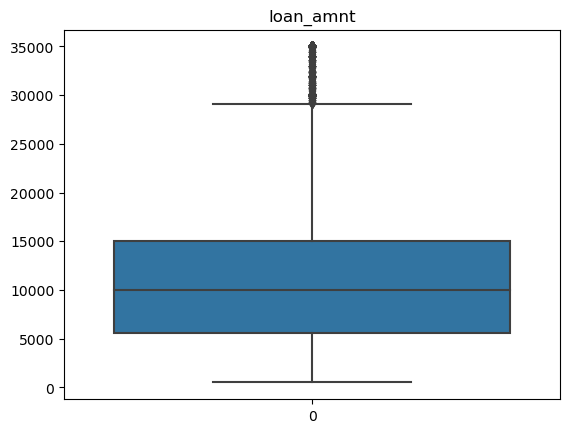

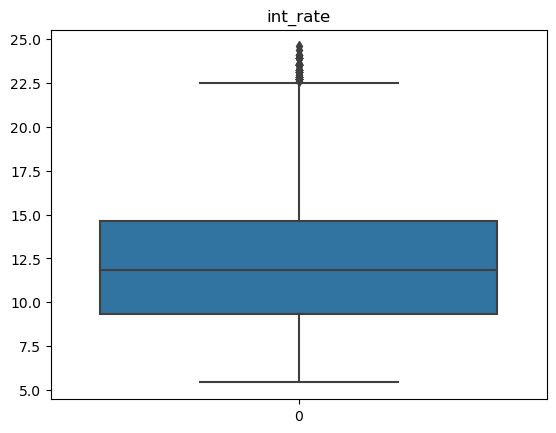

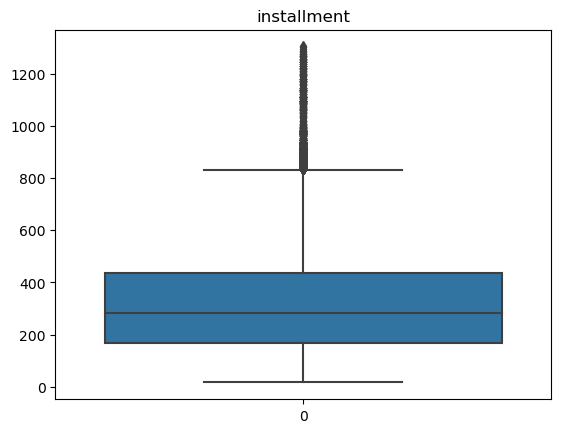

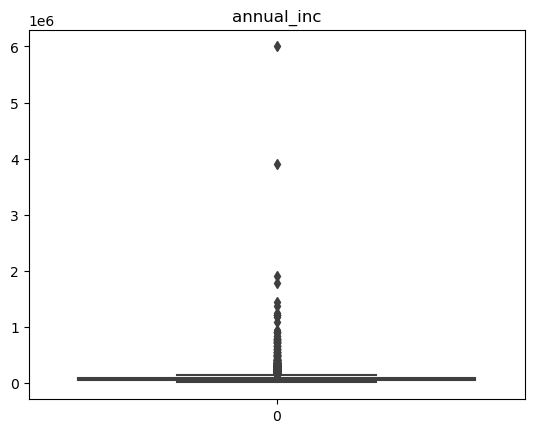

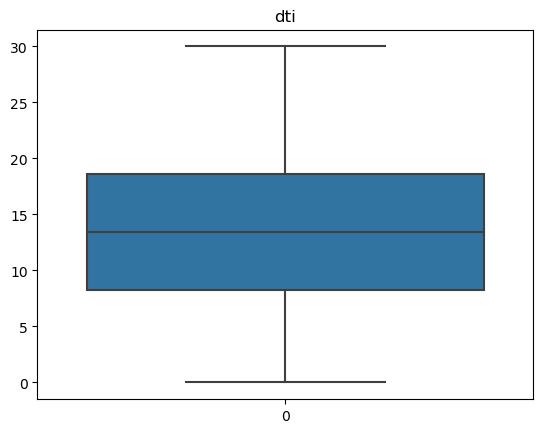

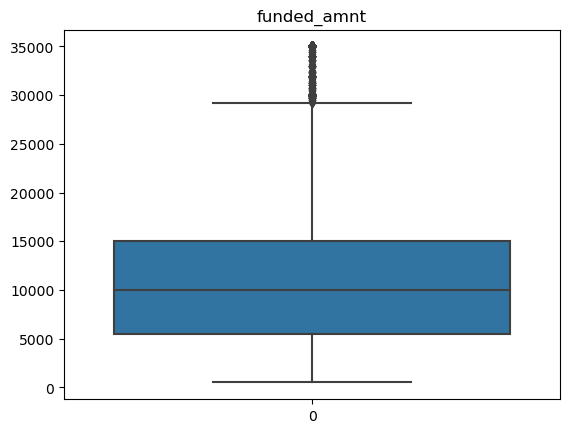

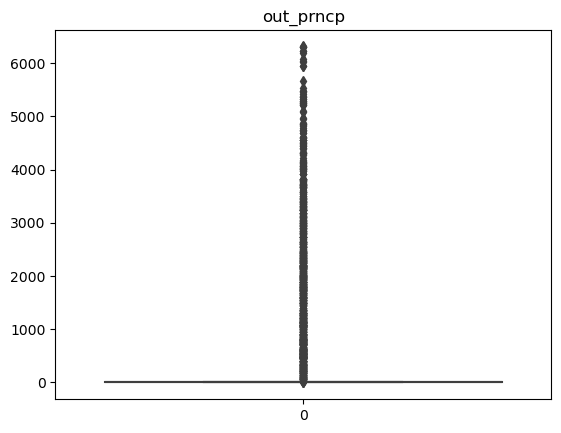

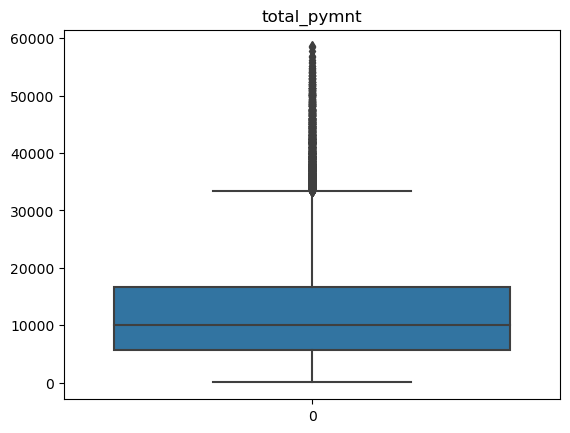

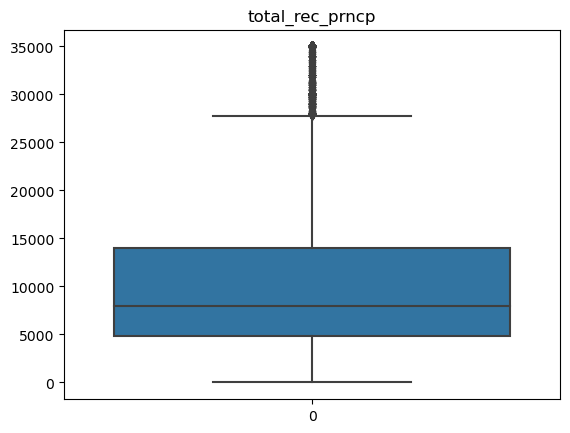

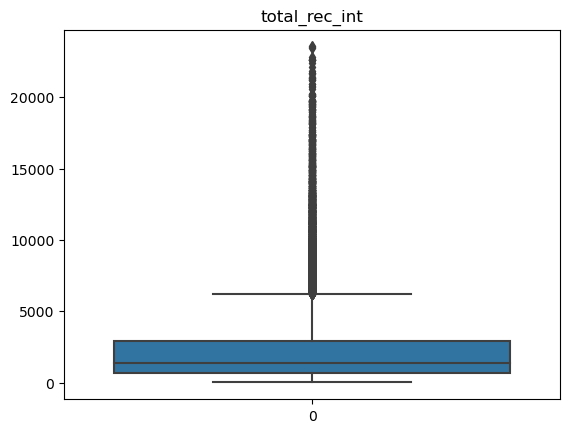

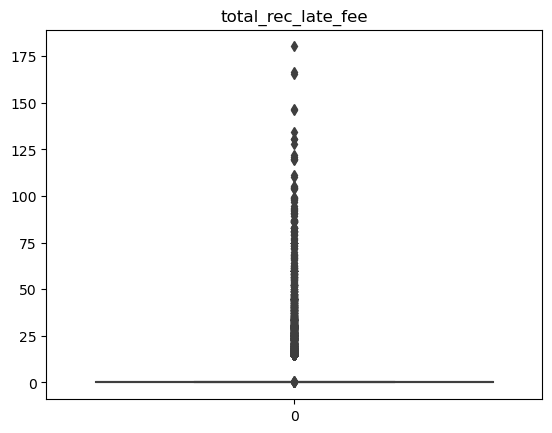

In [37]:
for column_name in numerical_variables['basic']:
    sns.boxplot(df_lender[column_name])
    plt.title(column_name)
    plt.show()

### Univariate analysis on catagorical varibales:
Next our analysis we will go through the distribution of basic catagorical variables using following code with <b>bar</b> plots.

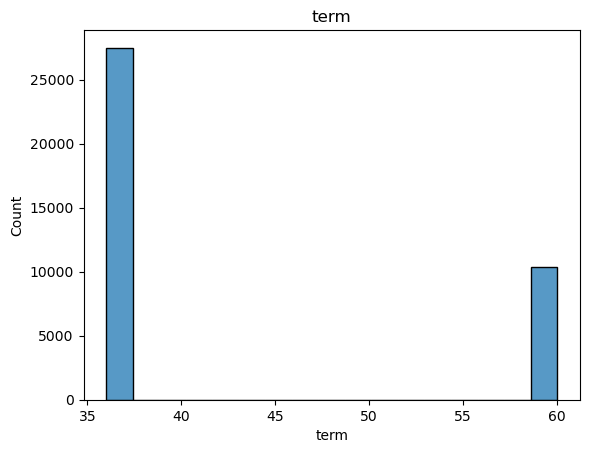

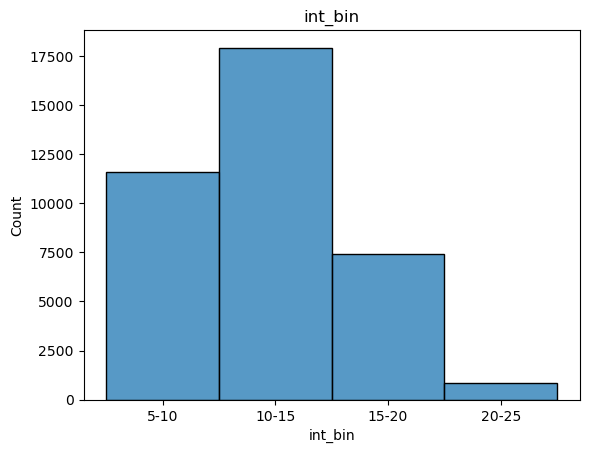

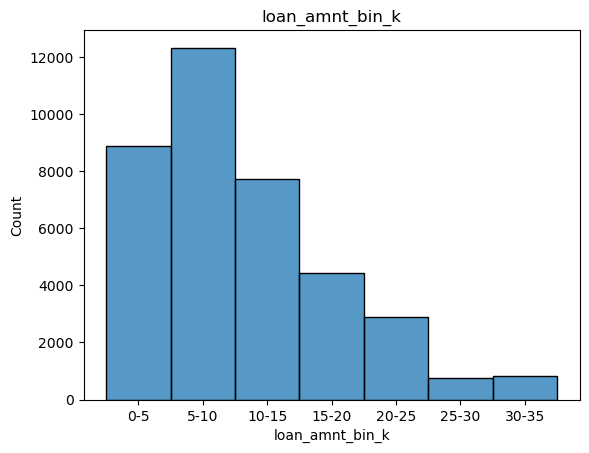

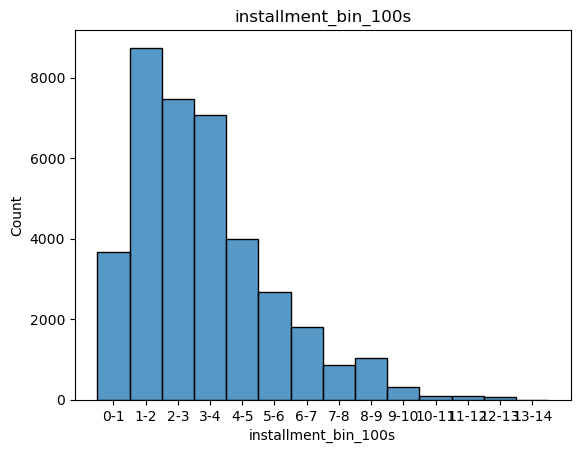

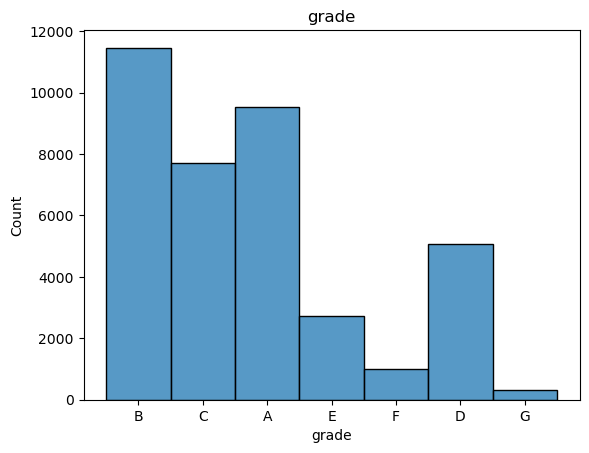

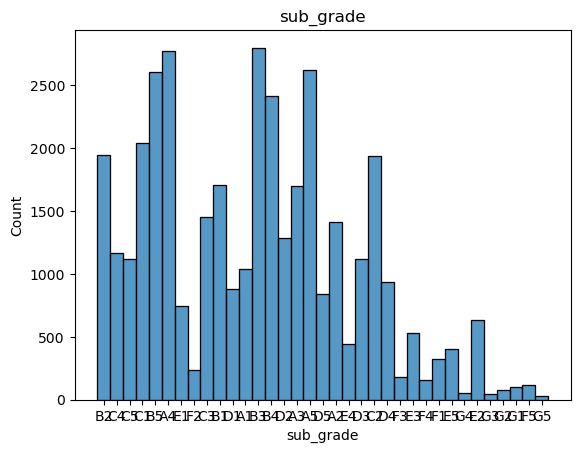

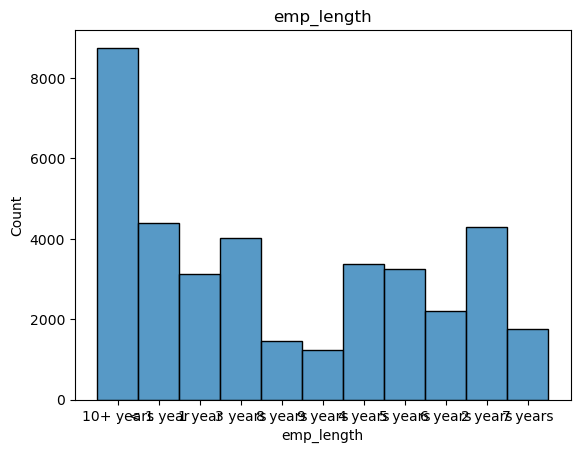

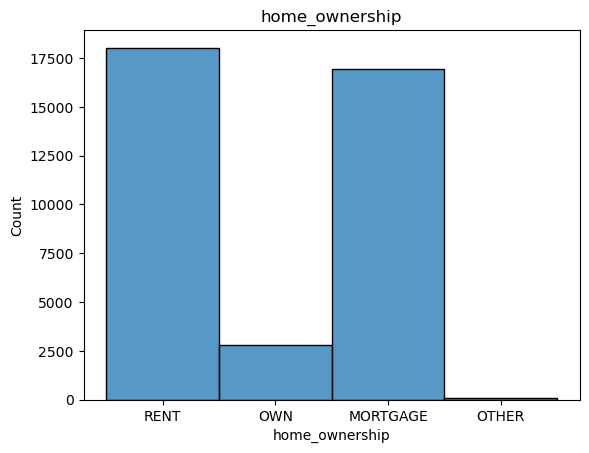

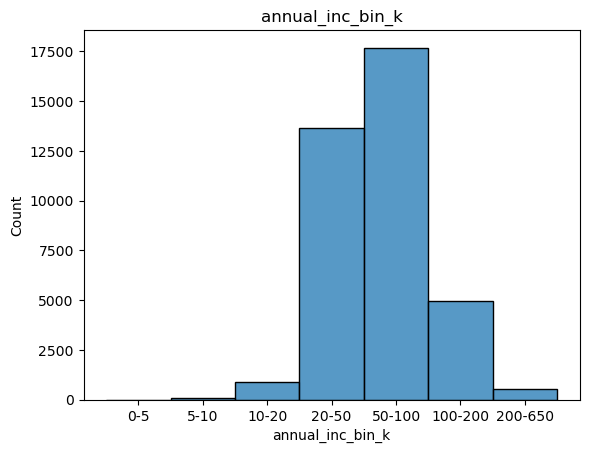

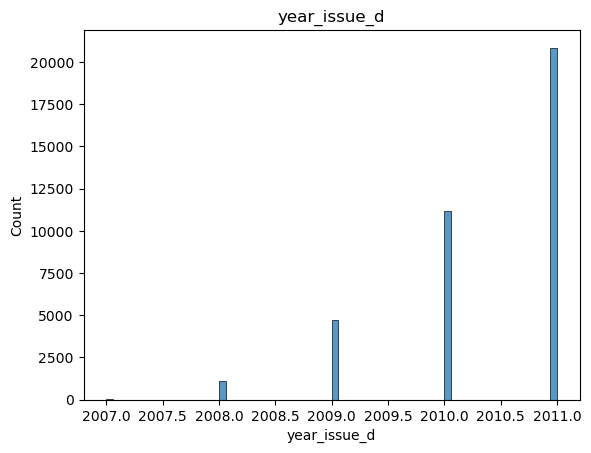

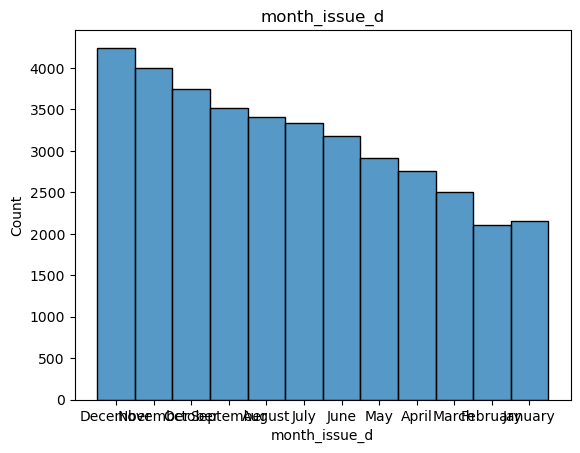

In [41]:
for column_name in catagorical_variables['basic']:
    sns.histplot(df_lender[column_name])
    plt.title(column_name)
    plt.show()